In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import net_class


ModuleNotFoundError: No module named 'net_class'

In [3]:
# #!/usr/bin/env python

# import numpy as np
# import matplotlib.pyplot as plt



class base(object):
    #This is the base class. Doesn't work as stand alone

    def __init__(self):
        if self.x_min is not None:
            #check that the sizes are the same
            assert np.asarray(self.x_min).shape == np.asarray(self.x_max).shape

            #if its a list, need to be right dimension
            if isinstance(self.x_min, list):
                assert len(self.x_min) == self.dim

    def plot(self, x, f):

        # print("shape x = ", x.shape)
        plt.figure()
        lists = sorted(zip(*[x[:,0], self.eval_func(x)]))
        new_x, new_y = list(zip(*lists))
        plt.plot(new_x, new_y, label = "Truth")
        plt.plot(x[:,0], f, '.', label = "Data")
        # plt.plot(x, self.eval_func(x), label = "Truth")
        plt.legend()
        plt.title(self.name)
        plt.show()
        plt.close()


class Sin(base):
# https://al-roomi.org/benchmarks/unconstrained/n-dimensions/192-step-function-no-1
    def __init__(self, x_min = -3, x_max = 5, pos_text = [0, 0.5, 1, 0], dim=2):

        self.has_truth = True

        self.x_min = x_min
        self.x_max = x_max

        #These won't every be changing for this problem
        self.name = "Sin_" + str(dim)
        self.out_dim = 1

        self.dim = dim
        self.pos_text = pos_text * dim*2

        super().__init__()

    def __call__(self, x):
        try:
            x = x.detach().numpy()
        except:
            pass
        sum = np.sum(x, axis = 1)
        return np.sin(sum)



In [4]:
model = Sin(dim=1, x_min = -np.pi, x_max = np.pi)
model = net_class.Net(model,sigma=0)

C:\Users\16kat\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


(--> new model saved @ epoch 99)
100
Training error =  0.085429646
Validation error =  0.08240759
Best Loss =  0.08240758627653122


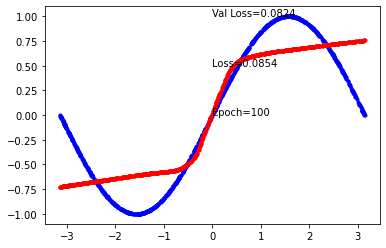

(--> new model saved @ epoch 199)
200
Training error =  0.0026999135
Validation error =  0.0022082576
Best Loss =  0.002208257559686899


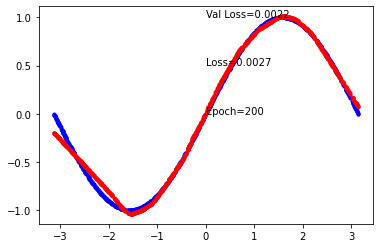

(--> new model saved @ epoch 299)
Error reached low enough.


In [5]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
model.train_model(optimizer, criterion,  graph = True, to_print = True, seed = False, save_end = False)


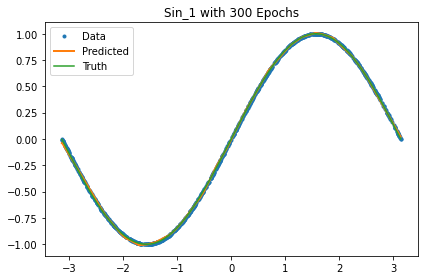

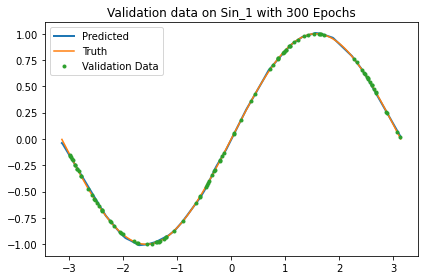

In [6]:
model.plot_predicted_all_dim(True)

In [143]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from functions import *
from data_class import *


from sklearn.model_selection import train_test_split


#The useful tutorial that I stole a lot form
# https://www.guru99.com/pytorch-tutorial.html#6
class Net(nn.Module):
    def __init__(self, dim = 1,out_dim = 1,n_hidden_nodes=20, n_hidden_layers=5,
        PATH="model.pt", activation=nn.ReLU(), n_train=1000,n_val=100,sigma=1, n_epochs = 5000,
        x = None, x_val = None, f = None, f_val = None, pick_data = True,
        min_error = 0.001, ):

        super(Net, self).__init__()


        self.n_hidden_layers = n_hidden_layers
        self.n_hidden_nodes = n_hidden_nodes
        
        print("dim = ", dim)

        self.hidden = nn.Linear(dim, n_hidden_nodes)   # hidden layer
        for i in range(self.n_hidden_layers):
            self.add_module('Linear_{}'.format(i), torch.nn.Linear(n_hidden_nodes, n_hidden_nodes))
        self.predict = nn.Linear(n_hidden_nodes, out_dim)   # output layer


        self.activation = activation

    def forward(self, x):
        #relu
        x = self.activation(self.hidden(x))#.float()))      # activation function for hidden layer
        for i in range(self.n_hidden_layers):
            x = self.activation(self._modules['Linear_{}'.format(i)](x))
        x = self.predict(x)             # linear output
        return x


    def train_model(self,optimizer, loss_func,  inputs, outputs, n_epochs = 1000, threshold = 1e-5):

        print("inputs size = ", inputs.shape)
        print("outputs size = ", outputs.shape)
#         n_epochs = 100
        for epoch in range(n_epochs):
            outputs = outputs.reshape(-1, 1)

            prediction = self.forward(inputs.float())

            loss = loss_func(prediction.float(), outputs.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if epoch % 100 == 0:
                print("Epoch = ", epoch, ": Training error = ", loss.data.numpy())
                
            if loss < threshold:
                return
        return




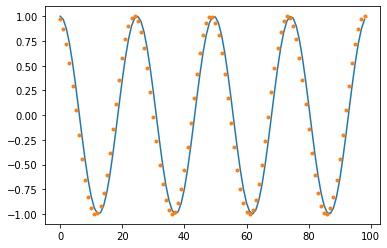

In [8]:
t = np.linspace(0,8*np.pi, 100)#np.random.uniform(self.model.x_min, self.model.x_max, size = (n, self.model.dim))
x = np.cos(t[:-1])
y = np.cos(t[1:])
plt.plot(x)
plt.plot(y, '.')
# f = self.model(x)
# noise = np.random.normal(0, sigma, size =  n)

# return (x, f + noise)
# (x.astype(float), (f + noise).astype(float))

# (x, f) = self.model()

In [15]:
# model = Sin(dim=1, x_min = -np.pi, x_max = np.pi)
# model = Net(model,sigma=0)

# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters())
# print("input shape = ", torch.tensor(x).unsqueeze(1).shape)
model.train_model(optimizer, criterion, torch.tensor(x).unsqueeze(1),torch.tensor(y))

inputs size =  torch.Size([99, 1])
outputs size =  torch.Size([99])
Epoch =  0 : Training error =  0.031615015
Epoch =  1 : Training error =  0.031613592
Epoch =  2 : Training error =  0.03161212
Epoch =  3 : Training error =  0.03161074
Epoch =  4 : Training error =  0.031609524
Epoch =  5 : Training error =  0.031608313
Epoch =  6 : Training error =  0.03160699
Epoch =  7 : Training error =  0.03160579
Epoch =  8 : Training error =  0.03160469
Epoch =  9 : Training error =  0.03160356
Epoch =  10 : Training error =  0.031602453
Epoch =  11 : Training error =  0.031601474
Epoch =  12 : Training error =  0.031600524
Epoch =  13 : Training error =  0.031599563
Epoch =  14 : Training error =  0.031598635
Epoch =  15 : Training error =  0.031597726
Epoch =  16 : Training error =  0.031596832
Epoch =  17 : Training error =  0.031595968
Epoch =  18 : Training error =  0.03159511
Epoch =  19 : Training error =  0.03159426
Epoch =  20 : Training error =  0.03159345
Epoch =  21 : Training erro

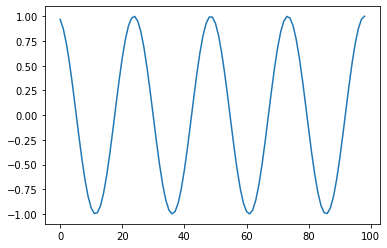

In [16]:
# plt.plot(x,y)
plt.plot(y)
# plt.plot(x, model(torch.tensor(x).unsqueeze(1).float()).detach().numpy())
# torch.tensor(x).unsqueeze(1).float().shape

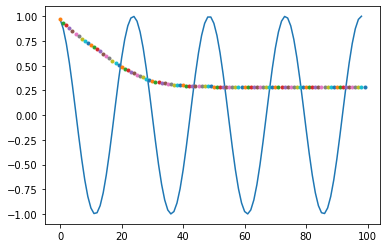

In [17]:
# print(torch.tensor(x[0:1]).unsqueeze(1))
plt.plot(y)
t = 0
y_pred = model(torch.tensor(x[0:1]).unsqueeze(1).float())
plt.plot(t,y_pred.detach().numpy(),'.')
for i in range(99):
    y_next = model(y_pred)
    plt.plot(i + 1, y_next.detach().numpy(),'.')
    y_pred = y_next
    

In [98]:
t = torch.tensor(np.linspace(0,8*np.pi, 100))#np.random.uniform(self.model.x_min, self.model.x_max, size = (n, self.model.dim))
x = np.cos(t[1:])
y = np.cos(t[:-1])
# plt.plot(x)
# plt.plot(y, '.')


inputs = torch.cat((torch.cos(t[:-2]).unsqueeze(1), torch.cos(t[1:-1]).unsqueeze(1)), axis = 1)
print(inputs.shape)
outputs = torch.cos(t[2:])
print(outputs.shape)

torch.Size([98, 2])
torch.Size([98])


In [99]:
# model = Sin(dim=2, x_min = -np.pi, x_max = np.pi)
model = Net(dim=2)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
model.train_model(optimizer, criterion, inputs,outputs)

dim =  2
inputs size =  torch.Size([98, 2])
outputs size =  torch.Size([98])
Epoch =  0 : Training error =  0.52053446
Epoch =  100 : Training error =  0.026968068
Epoch =  200 : Training error =  9.1539885e-05
Epoch =  300 : Training error =  2.6438238e-05
Epoch =  400 : Training error =  1.8100365e-05
Epoch =  500 : Training error =  1.4387454e-05
Epoch =  600 : Training error =  1.2094221e-05
Epoch =  700 : Training error =  1.0290922e-05
Epoch =  800 : Training error =  9.076685e-06
Epoch =  900 : Training error =  8.115732e-06


torch.Size([98, 2])
range(2, 100) torch.Size([98])
torch.Size([2, 2])
inputs[0:2].float() shape =  torch.Size([2, 1])
model(inputs[0:2].float()) =  torch.Size([2, 1])
tensor([[1.0000, 0.8819],
        [0.9679, 0.7246]], grad_fn=<CatBackward>)
torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_pred.shape =  torch.Size([2, 2])
y_p

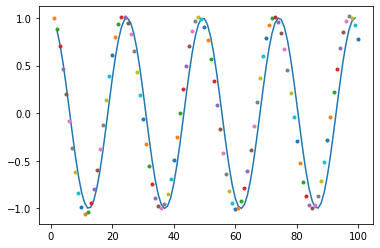

In [100]:
# print(torch.tensor(x[0:1]).unsqueeze(1))
print(inputs.shape)
print(range(2, 100),outputs.shape)
plt.plot(range(2, 100),outputs)
t = 1
print(inputs[0:2].float().shape)
y_pred = model(inputs[0:2].float())
print("inputs[0:2].float() shape = ", inputs[0:2,0:1].float().shape)
print("model(inputs[0:2].float()) = ", y_pred.shape)
y_pred = torch.cat((inputs[0:2,0:1].float(),y_pred), axis = 1)
print(y_pred)
print(y_pred.shape)
plt.plot(t,y_pred.detach().numpy()[0,0],'.')
for i in range(99):
    y_next = model(y_pred)
    print("y_pred.shape = ", y_pred.shape)
    y_next = torch.cat((y_pred[:, 1:2], y_next), axis = 1)
    plt.plot(i + 2, y_next.detach().numpy()[0,0],'.')
    y_pred = y_next
    

In [1]:
# make it to take n input times
def make_data(n):
    t = torch.tensor(np.linspace(0,80*np.pi, 1000))
    data = (torch.cos(t)+torch.cos(2*t)+torch.cos(4*t)).unsqueeze(1)
    print(data.shape)
    #normalize
    data = (data - min(data))/(max(data) - min(data))
    inputs = torch.cat((data[:-n], data[1:(-n+1)]), axis = 1)
    for i in range(2,n):
        inputs = torch.cat((inputs, data[i:(-n+i)]), axis = 1)
    print(inputs.shape)
    outputs = data[n:]
    print(outputs.shape)
    return inputs, outputs

In [2]:
make_data(3)

NameError: name 'torch' is not defined

In [221]:
def make_and_train(n):
    inputs, outputs = make_data(n)
    model = Net(dim=n)

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters())
    model.train_model(optimizer, criterion, inputs,outputs, n_epochs = 5000)
    return model, inputs, outputs
model, inputs, outputs = make_and_train(11)

torch.Size([989, 11])
torch.Size([989, 1])
dim =  11
inputs size =  torch.Size([989, 11])
outputs size =  torch.Size([989, 1])
Epoch =  0 : Training error =  0.24765292
Epoch =  100 : Training error =  0.06328388
Epoch =  200 : Training error =  0.011329189
Epoch =  300 : Training error =  0.0020795446
Epoch =  400 : Training error =  0.00027085547
Epoch =  500 : Training error =  0.00010314074
Epoch =  600 : Training error =  7.3387746e-05
Epoch =  700 : Training error =  3.872799e-05
Epoch =  800 : Training error =  2.5627953e-05
Epoch =  900 : Training error =  2.830509e-05
Epoch =  1000 : Training error =  1.6698717e-05
Epoch =  1100 : Training error =  1.4231318e-05
Epoch =  1200 : Training error =  1.3375419e-05
Epoch =  1300 : Training error =  1.1986278e-05
Epoch =  1400 : Training error =  1.23566715e-05


dim =  11
y_pred shape  = torch.Size([11, 11])


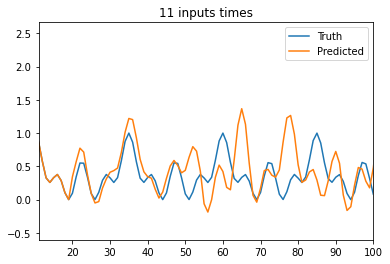

In [223]:
# print(torch.tensor(x[0:1]).unsqueeze(1))
# print(inputs.shape)
# print(range(2, 100),outputs.shape)
def plot(model, inputs, outputs):
    n_inputs, n = inputs.shape
    print("dim = ", n)
    
    y_pred = model(inputs[0:n].float())
    y_pred = torch.cat((inputs[0:n,0:(n-1)].float(),y_pred), axis = 1)
    print("y_pred shape  =", y_pred.shape)
    to_plot = y_pred.detach().numpy()[:,0]
    for i in range(n_inputs-1):
        y_next = model(y_pred)
        y_next = torch.cat((y_pred[:, 1:n_inputs], y_next), axis = 1)
        to_plot = np.append(to_plot, y_next.detach().numpy()[0,0])
        y_pred = y_next
#         print("y_pred shape  =", y_pred.shape)
    
    plt.plot(range(n-1,n-1 + len(inputs[:,0])), inputs[:,0], label = "Truth")
#     plt.plot(outputs[:,0], label="truth")
    plt.plot(to_plot,label = "Predicted")
    plt.legend()
    
    plt.title(str(n) + " inputs times")
    plt.xlim([n,100])
    plt.show()
    
plot(model, inputs, outputs)